## Step 1: Import Required Libraries
Welcome, young deep learning adventurer! Before we embark on our journey to build an Autoencoder for the famous MNIST dataset, we need to gather our tools. In the world of PyTorch, that means importing some essential libraries.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


## Step 2: Load and Preprocess MNIST Data
Now, we need some data to work with. The MNIST dataset consists of handwritten digits (0-9), and it's our mission to compress and reconstruct them using an Autoencoder!
Let's load the data and apply some necessary transformations.

In [2]:
# Define a transformation to convert images to tensors and normalize them
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)
print('MNIST dataset loaded successfully!')

100%|██████████| 9.91M/9.91M [00:02<00:00, 3.85MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 53.6kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 841kB/s] 
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]

MNIST dataset loaded successfully!


## Step 3: Define the Autoencoder Architecture
It's time to design our magical Autoencoder! An Autoencoder is a neural network that learns to encode data into a lower-dimensional space (the bottleneck) and then reconstructs it back to its original form.
Our architecture will have an Encoder and a Decoder.

In [12]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2)
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 28*28),
            nn.Tanh(),
            nn.Unflatten(1, (1, 28, 28))
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

print('Autoencoder model defined!')


Autoencoder model defined!


## Step 4: Initialize Model, Loss Function, and Optimizer
Now that we have our Autoencoder model, let's summon the loss function and optimizer to help train it.
The Mean Squared Error (MSE) loss will measure how different the reconstructed images are from the originals, and the Adam optimizer will guide our model toward enlightenment!

In [13]:
model = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
print('Model, loss function, and optimizer initialized!')
print(f'device: {device}')
print('-' * 100)
print(f'model: {model}')
print('-' * 100)
print(f'Loss: {criterion}')
print('-' * 100)
print(f'optimizer: {optimizer}')
print('-' * 100)


Model, loss function, and optimizer initialized!
device: cpu
----------------------------------------------------------------------------------------------------
model: Autoencoder(
  (encoder): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.2)
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): LeakyReLU(negative_slope=0.2)
    (10): Linear(in_features=128, out_features=64, bias=True)
    (11): LeakyReLU(negative_slope=0.2)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=12

## Step 5: Train the Autoencoder
Training time! We'll loop through multiple epochs, feeding the Autoencoder images from the MNIST dataset and letting it learn to compress and reconstruct them.

In [14]:
from tqdm import tqdm

num_epochs = 25
print('Starting training...')
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in tqdm(trainloader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False):
        images = images.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")
print('Training completed!')

Starting training...


Epoch [1/25], Loss: 0.1151


Epoch [2/25], Loss: 0.0709


Epoch [3/25], Loss: 0.0597


Epoch [4/25], Loss: 0.0528


Epoch [5/25], Loss: 0.0480


Epoch [6/25], Loss: 0.0445


Epoch [7/25], Loss: 0.0421


Epoch [8/25], Loss: 0.0403


Epoch [9/25], Loss: 0.0389


Epoch [10/25], Loss: 0.0376


Epoch [11/25], Loss: 0.0364


Epoch [12/25], Loss: 0.0354


Epoch [13/25], Loss: 0.0344


Epoch [14/25], Loss: 0.0336


Epoch [15/25], Loss: 0.0328


Epoch [16/25], Loss: 0.0321


Epoch [17/25], Loss: 0.0316


Epoch [18/25], Loss: 0.0310


Epoch [19/25], Loss: 0.0306


Epoch [20/25], Loss: 0.0301


Epoch [21/25], Loss: 0.0298


Epoch [22/25], Loss: 0.0294


Epoch [23/25], Loss: 0.0289


Epoch [24/25], Loss: 0.0285


Epoch [25/25], Loss: 0.0282
Training completed!


## Step 6: Test the Autoencoder and Visualize Results
Let's see how well our Autoencoder has learned its magic! We'll pass test images through it and visualize both the original and reconstructed images.

Displaying test images...


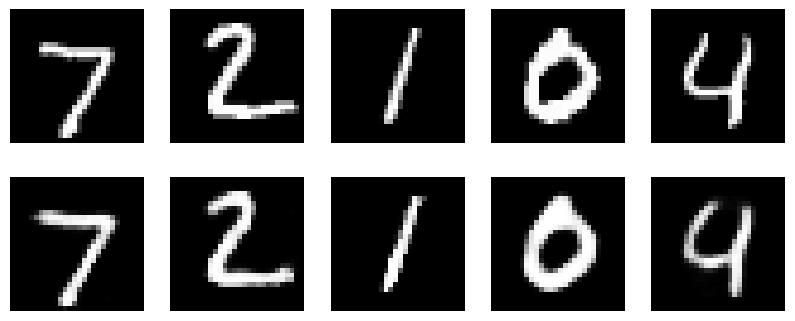

In [15]:
def show_images(original, reconstructed, num_images=5):
    plt.figure(figsize=(10, 4))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].cpu().squeeze(), cmap='gray')
        plt.axis('off')
        plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i].cpu().squeeze().detach().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()

# Test Images
test_images, _ = next(iter(testloader))
test_images = test_images.to(device)
reconstructed_images = model(test_images)
print('Displaying test images...')
show_images(test_images, reconstructed_images)

## Step 7: Save and Load the Model
We've successfully trained our Autoencoder, but we don't want to lose our hard-earned knowledge.
Let's save the model and learn how to load it for future use.

In [16]:
torch.save(model.state_dict(), 'autoencoder.pth')
print('Model saved successfully!')

Model saved successfully!
